## Se prueba la etapa completa de optimización (test sala 2)

In [1]:
import os
import time
os.chdir('..')

In [2]:
from outline_optim import find_best_outline
from complex_outline_optim import find_complex_outline_gen2, find_complex_outline_gen3, find_complex_outline_gen4, calculate_initial

/home/diber/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


pygame 2.6.1 (SDL 2.28.4, Python 3.10.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


Defino las condiciones (el input del usuario)

In [3]:
# Condiciones de la sala
Lx = 3       # Largo de la sala en X 
Ly = 4.2         # Largo de la sala en Y
Lz = 2.4       # Alto de la sala
Dx = 0.5       # Delta X
Dy = 0.8       # Delta Y
Dz = 0.2      # Delta Z

## Posiciones fuente y receptor (en metros)
source_position = (2, 3, 1.3)
receptor_position = (1.5, 2, 1.2)

## Número de cortes en las paredes
n_walls = 2    

## Tipo de optimización (slow, medium, fast)
optim_type = "slow"

Proceso de optimización tipo algorítmo genético

In [4]:
if optim_type == "fast":
    salas_g1 = 500
    salas_g2 = 150     # Cantidad de salas para iterar
    next_gen_g3 = 10   # Cantidad de salas que pasan de la iteración anterior
    salas_g3 = 10      # Cantidad de salas random para agregar
    next_gen_g4 = 3    # Cantidad de salas que pasan de la iteración anterior
    mut_ammount = 2    # Cantidad de mutaciones por sala

if optim_type == "medium":
    salas_g1 = 1000
    salas_g2 = 300     # Cantidad de salas para iterar
    next_gen_g3 = 20   # Cantidad de salas que pasan de la iteración anterior
    salas_g3 = 20      # Cantidad de salas random para agregar
    next_gen_g4 = 3    # Cantidad de salas que pasan de la iteración anterior
    mut_ammount = 4    # Cantidad de mutaciones por sala

if optim_type == "slow":
    salas_g1 = 5000
    salas_g2 = 600     # Cantidad de salas para iterar
    next_gen_g3 = 50   # Cantidad de salas que pasan de la iteración anterior
    salas_g3 = 100      # Cantidad de salas random para agregar
    next_gen_g4 = 5    # Cantidad de salas que pasan de la iteración anterior
    mut_ammount = 6    # Cantidad de mutaciones por sala

## 0) Evalúa condiciones iniciales
start0 = time.time()
merit_0, mag0 = calculate_initial(Lx, Ly, Lz, source_position, receptor_position)
time0 = time.time() - start0

## 1) Mejores dimensiones con geometrías simples
start1 = time.time()
final_best_room, best_room_spacing, merit_gen1_modal, mag_gen1_modal = find_best_outline(Lx, Ly, Lz, Dx, Dy, Dz, source_position, receptor_position, salas_g1)

# Define nuevas posiciones para estas dimensiones(sería como una translación del problema al subcuadrado mas chico)
Lx_new, Ly_new, Lz_new = final_best_room
Dx_new, Dy_new = best_room_spacing
dx_room = (Lx - Lx_new)/2
dy_room = (Ly - Ly_new)/2
new_source_pos = (source_position[0] - dx_room, source_position[1] - dy_room, source_position[2])
new_receptor_pos = (receptor_position[0] - dx_room, receptor_position[1] - dy_room, receptor_position[2])

merit_g1, mag_g1 = calculate_initial(Lx_new, Ly_new, Lz, source_position, receptor_position)
time1 = time.time() - start1

## 2) Geometría compleja partiendo de mejor geometría simple
start2 = time.time()
best_rooms_g2, merits_g2, mags_g2 = find_complex_outline_gen2(Lx_new, Ly_new, Lz_new, Dx_new, Dy_new, new_source_pos, new_receptor_pos, n_walls, salas_g2) 
time2 = time.time() - start2

## 3) Geometría compleja mas ancho de banda
start3 = time.time()
best_rooms_g3, merits_g3, mag_g3 = find_complex_outline_gen3(Lx_new, Ly_new, Lz_new, Dx_new, Dy_new, new_source_pos, new_receptor_pos, n_walls, best_rooms_g2[:next_gen_g3], salas_g3) 
time3 = time.time() - start3

## 4) Geometría compleja mas ancho de banda y resolución (se introducen mutaciones)
start4 = time.time()
best_rooms_g4, merits_g4, mag_g4 = find_complex_outline_gen4(Lx_new, Ly_new, Lz_new, Dx_new, Dy_new, new_source_pos, new_receptor_pos, best_rooms_g3[:next_gen_g4], mut_ammount) 
time4 = time.time() - start4


Info    : Reading 'mallado/room_base_optim1.msh'...
Info    : 33 entities
Info    : 1150 nodes
Info    : 6501 elements
Info    : Done reading 'mallado/room_base_optim1.msh'
Info    : Reading 'mallado/room_base_optim2.msh'...
Info    : 33 entities
Info    : 4068 nodes
Info    : 23902 elements
Info    : Done reading 'mallado/room_base_optim2.msh'
Info    : Reading 'mallado/room_base_optim3.msh'...
Info    : 33 entities
Info    : 7872 nodes
Info    : 46614 elements
Info    : Done reading 'mallado/room_base_optim3.msh'
Info    : Reading 'mallado/room_base_optim1.msh'...
Info    : 33 entities
Info    : 1019 nodes
Info    : 5727 elements
Info    : Done reading 'mallado/room_base_optim1.msh'
Info    : Reading 'mallado/room_base_optim2.msh'...
Info    : 33 entities
Info    : 2369 nodes
Info    : 13402 elements
Info    : Done reading 'mallado/room_base_optim2.msh'
Info    : Reading 'mallado/room_base_optim3.msh'...
Info    : 33 entities
Info    : 7576 nodes
Info    : 43809 elements
Info    : Do

Resultados con configuración FAST:

In [6]:
print("El valor original de mérito es: ", merit_0)
print("Tiempo de ejecución en minutos fue de: ", time0/60)
print("...................")
print("Gen 1(con modal sum y geometrías simples)")
print("El mejor mérito es: ", merit_g1)
print("Tiempo de ejecución en minutos fue de: ", time1/60)
print("...................")
print("Gen 2 (con FEM Source hasta 150 Hz | res=2)")
print("El mejor mérito es ", merits_g2[0])
print("Tiempo de ejecución en minutos fue de: ", time2/60)
print("...................")
print("Gen 3 (con FEM Source hasta 180 Hz | res=2)")
print("El mejor mérito es ", merits_g3[0])
print("Tiempo de ejecución en minutos fue de: ", time3/60)
print("...................")
print("Gen 4 (con FEM Source hasta 200 Hz | res=1)")
print("El mejor mérito es ", merits_g4[0])
print("Tiempo de ejecución en minutos fue de: ", time4/60)
print("...................")
print("Tiempo total en minutos: ", (time0 + time1 + time2 + time3 + time4)/60)

El valor original de mérito es:  (20.739449472459967, 16.349083977302644, 4.390365495157321)
Tiempo de ejecución en minutos fue de:  0.5384834289550782
...................
Gen 1(con modal sum y geometrías simples)
El mejor mérito es:  (16.0719665176384, 13.40132010342524, 2.670646414213162)
Tiempo de ejecución en minutos fue de:  0.4145109017690023
...................
Gen 2 (con FEM Source hasta 150 Hz | res=2)
El mejor mérito es  (16.327068360052678, 12.47718158610708, 3.849886773945598)
Tiempo de ejecución en minutos fue de:  7.23117622534434
...................
Gen 3 (con FEM Source hasta 180 Hz | res=2)
El mejor mérito es  (18.75106245180691, 14.705275191473891, 4.04578726033302)
Tiempo de ejecución en minutos fue de:  1.3248986959457398
...................
Gen 4 (con FEM Source hasta 200 Hz | res=1)
El mejor mérito es  (18.497184410274322, 14.625690206682394, 3.8714942035919275)
Tiempo de ejecución en minutos fue de:  3.650784460703532
...................
Tiempo total en minutos: 

Resultado con configuración MEDIUM:

In [9]:
print("El valor original de mérito es: ", merit_0)
print("Tiempo de ejecución en minutos fue de: ", time0/60)
print("...................")
print("Gen 1(con modal sum y geometrías simples)")
print("El mejor mérito es: ", merit_g1)
print("Tiempo de ejecución en minutos fue de: ", time1/60)
print("...................")
print("Gen 2 (con FEM Source hasta 150 Hz | res=2)")
print("El mejor mérito es ", merits_g2[0])
print("Tiempo de ejecución en minutos fue de: ", time2/60)
print("...................")
print("Gen 3 (con FEM Source hasta 180 Hz | res=2)")
print("El mejor mérito es ", merits_g3[0])
print("Tiempo de ejecución en minutos fue de: ", time3/60)
print("...................")
print("Gen 4 (con FEM Source hasta 200 Hz | res=1)")
print("El mejor mérito es ", merits_g4[0])
print("Tiempo de ejecución en minutos fue de: ", time4/60)
print("...................")
print("Tiempo total en minutos: ", (time0 + time1 + time2 + time3 + time4)/60)

El valor original de mérito es:  (20.739449472459967, 16.349083977302644, 4.390365495157321)
Tiempo de ejecución en minutos fue de:  0.5417284488677978
...................
Gen 1(con modal sum y geometrías simples)
El mejor mérito es:  (15.659166343748847, 12.85141895181915, 2.8077473919296962)
Tiempo de ejecución en minutos fue de:  0.41620349089304604
...................
Gen 2 (con FEM Source hasta 150 Hz | res=2)
El mejor mérito es  (14.61558787122058, 11.224213568960357, 3.391374302260223)
Tiempo de ejecución en minutos fue de:  17.01314159631729
...................
Gen 3 (con FEM Source hasta 180 Hz | res=2)
El mejor mérito es  (15.091306765822505, 11.682099411659392, 3.409207354163113)
Tiempo de ejecución en minutos fue de:  2.218590486049652
...................
Gen 4 (con FEM Source hasta 200 Hz | res=1)
El mejor mérito es  (15.129087014395026, 12.157669989713638, 2.971417024681388)
Tiempo de ejecución en minutos fue de:  5.606028596560161
...................
Tiempo total en minu

Resultados en configuración SLOW:

In [5]:
print("El valor original de mérito es: ", merit_0)
print("Tiempo de ejecución en minutos fue de: ", time0/60)
print("...................")
print("Gen 1(con modal sum y geometrías simples)")
print("El mejor mérito es: ", merit_g1)
print("Tiempo de ejecución en minutos fue de: ", time1/60)
print("...................")
print("Gen 2 (con FEM Source hasta 150 Hz | res=2)")
print("El mejor mérito es ", merits_g2[0])
print("Tiempo de ejecución en minutos fue de: ", time2/60)
print("...................")
print("Gen 3 (con FEM Source hasta 180 Hz | res=2)")
print("El mejor mérito es ", merits_g3[0])
print("Tiempo de ejecución en minutos fue de: ", time3/60)
print("...................")
print("Gen 4 (con FEM Source hasta 200 Hz | res=1)")
print("El mejor mérito es ", merits_g4[0])
print("Tiempo de ejecución en minutos fue de: ", time4/60)
print("...................")
print("Tiempo total en minutos: ", (time0 + time1 + time2 + time3 + time4)/60)

El valor original de mérito es:  (19.076146607435042, 14.685781112282402, 4.390365495152638)
Tiempo de ejecución en minutos fue de:  0.5549363096555074
...................
Gen 1(con modal sum y geometrías simples)
El mejor mérito es:  (14.718735861830265, 11.973360453646162, 2.7453754081841018)
Tiempo de ejecución en minutos fue de:  0.6184322079022725
...................
Gen 2 (con FEM Source hasta 150 Hz | res=2)
El mejor mérito es  (13.100779431977092, 10.548216428909885, 2.552563003067206)
Tiempo de ejecución en minutos fue de:  29.811922109127046
...................
Gen 3 (con FEM Source hasta 180 Hz | res=2)
El mejor mérito es  (12.210035203448973, 9.477927130467808, 2.732108072981164)
Tiempo de ejecución en minutos fue de:  10.290882003307342
...................
Gen 4 (con FEM Source hasta 200 Hz | res=1)
El mejor mérito es  (12.505775720558702, 9.918164154716125, 2.587611565842577)
Tiempo de ejecución en minutos fue de:  12.956159540017445
...................
Tiempo total en mi

Acá en el método slow encontro una buena solución, el tema es que recién encontró la solución cuando lo ejecute una segunda vez. Es decir, esta pesando más la heurística de la generación 2 de que justo se genere una sala buena, porque si no encuentra en esa generación una sala que tenga un merito de 9 dB después no mejora, porque los cambios entre las generaciones para las 3 versiones es bastante constante.

## Grafico los resultados de la versión SLOW

Gráfico la rta base y la mejor respuesta de la versión SLOW

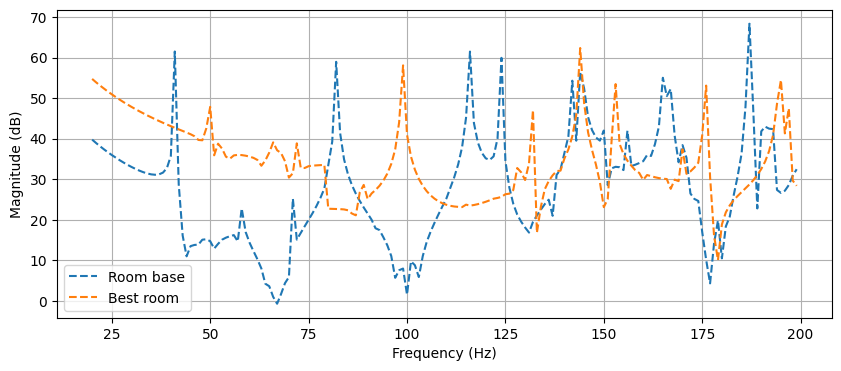

In [6]:
import numpy as np
import matplotlib.pyplot as plt

res_freq = 1
freqs = np.arange(20, 200, res_freq)

plt.figure("Resultado magnitud", figsize=(10, 4))
plt.plot(freqs, mag0, '--', label= "Room base")
plt.plot(freqs, mag_g4[0], '--', label= "Best room")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.legend()
plt.grid(True)
plt.show()


Cuarto original

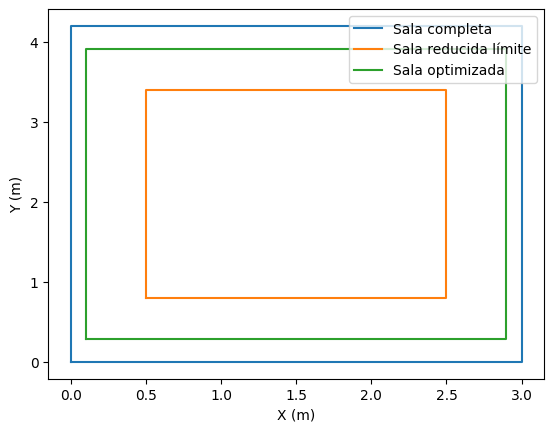

In [7]:
from plots.graph_room_outline import plot_outline_simple

plot_outline_simple(Lx, Ly, Dx, Dy, Lx_new, Ly_new)

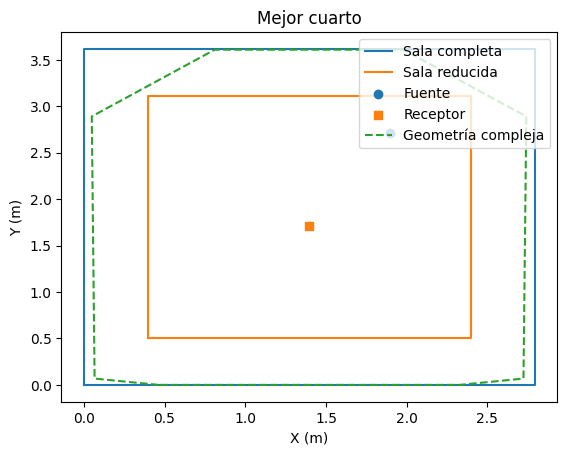

In [19]:
from plots.graph_room_outline import plot_room_outline

plot_room_outline(Lx_new * 100, Ly_new * 100, Dx_new *100, Dy_new * 100, new_source_pos, new_receptor_pos, best_rooms_g4[0], "Mejor cuarto")
# plot_room_outline(Lx * 100, Ly * 100, Dx *100, Dy * 100, source_position, receptor_position, [], "Mejor cuarto")

In [20]:
best_rooms_g4[0]

array([[0.46333333, 0.        ],
       [0.06668603, 0.06851271],
       [0.04927936, 2.89140787],
       [0.81083333, 3.61      ],
       [1.97916667, 3.61      ],
       [2.74072064, 2.89140787],
       [2.72331397, 0.06851271],
       [2.32666667, 0.        ]])

In [10]:
best_rooms_g4[1]

array([[0.46333333, 0.        ],
       [0.1       , 0.1       ],
       [0.        , 2.9       ],
       [0.81083333, 3.61      ],
       [1.97916667, 3.61      ],
       [2.79      , 2.9       ],
       [2.69      , 0.1       ],
       [2.32666667, 0.        ]])

In [11]:
print(Lx_new)
print(Ly_new)
print(Dx_new)
print(Dy_new)
print(new_source_pos)
print(new_receptor_pos)

2.7929918776755356
3.6182108849453156
0.3964959388377678
0.5091054424726575
(1.8964959388377678, 2.7091054424726577, 1.3)
(1.3964959388377678, 1.7091054424726577, 1.2)
